In [37]:
# Let us import hydroeval and check the version
import hydroeval
print(hydroeval.__version__)

0.1.0


In [38]:
# We will import a netcdf data for this example
# Install the netCDF4 package using the following command: conda install -c conda-forge netCDF4
from netCDF4 import Dataset

In [39]:
# Let us load the observed data first
with Dataset('./catchment.obs.flow.nc', 'r', format='NETCDF4') as f:
    obs_flow = f.variables['flow'][:]  # observed streamflow serie
# Let us check the dimension of the observed data

In [40]:
# Now, let us load the simulated data
with Dataset('./catchment.sim.flow.nc', 'r', format='NETCDF4') as f:
    sim_flow = f.variables['flow'][:]  # ensemble of simulated streamflow series
# Let us check the dimension of the simulated data

In [41]:
import pandas as pd
obs = pd.DataFrame(obs_flow,columns=['Obs'])
obs.head().T

,0,1,2,3,4
Obs,4.901051,4.288905,4.481438,7.945478,4.667372


In [42]:
sim = pd.DataFrame(sim_flow.T,columns=['Sim1','Sim2','Sim3','Sim4','Sim5','Sim6','Sim7','Sim8','Sim9','Sim10',
    'Sim11','Sim12','Sim13','Sim14','Sim15','Sim16','Sim17','Sim18','Sim19','Sim20'])
sim.head()

,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7,Sim8,Sim9,Sim10,Sim11,Sim12,Sim13,Sim14,Sim15,Sim16,Sim17,Sim18,Sim19,Sim20
0,1.063771,2.007536,1.214454,2.692770,1.396070,1.844142,1.640803,0.954048,1.504389,2.115008,0.794013,0.550339,1.748920,0.597982,1.195836,1.093881,1.551082,1.556347,1.137513,1.582958
1,1.121907,2.105129,1.259399,2.804215,1.415336,1.951381,1.708590,0.988717,1.587765,2.145530,0.809153,0.604028,1.796808,0.613097,1.302006,1.107714,1.554160,1.588246,1.173596,1.616097
2,1.307203,2.287112,1.771217,2.937074,1.449702,2.099528,1.797116,1.047202,1.678548,2.187140,0.831471,0.718370,1.863425,0.728677,1.438121,1.133653,1.560539,1.627271,1.227450,1.683875
3,1.649455,2.670139,3.179700,3.179014,1.520323,2.426937,1.969467,1.189887,1.787724,2.253980,0.874508,1.023334,2.004739,1.467674,1.706858,1.202565,1.576077,1.688534,1.343960,1.838314
4,1.667106,2.772402,3.000780,3.451881,1.577254,2.687345,2.159792,1.327840,1.919744,2.304150,0.934859,1.106226,2.145530,2.244114,2.001918,1.277795,1.596429,1.761711,1.463256,1.908583


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [44]:
import warnings
warnings.filterwarnings('ignore')

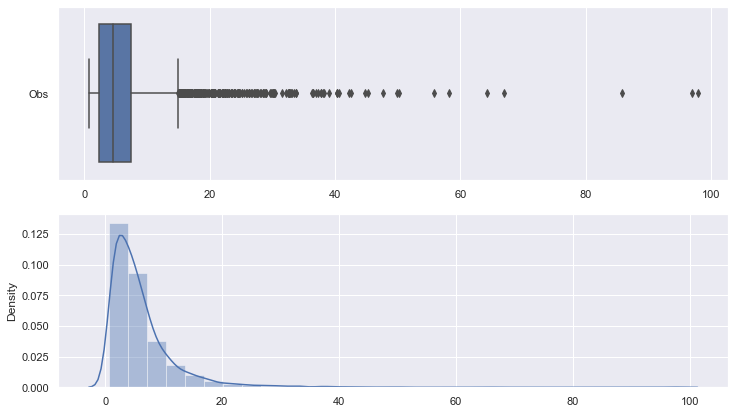

In [45]:
plt.figure(figsize=(12,7))
plt.subplot(211)
sns.boxplot(data=obs,orient='h');
plt.subplot(212)
sns.distplot(obs,kde=True,bins=30);

In [46]:
import numpy as np
# Let us create a
def histogram_boxplot(feature, figsize=(12,7), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.5, .5)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True) # boxplot will be created and a marker will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), linestyle='-') # Add median to the histogram

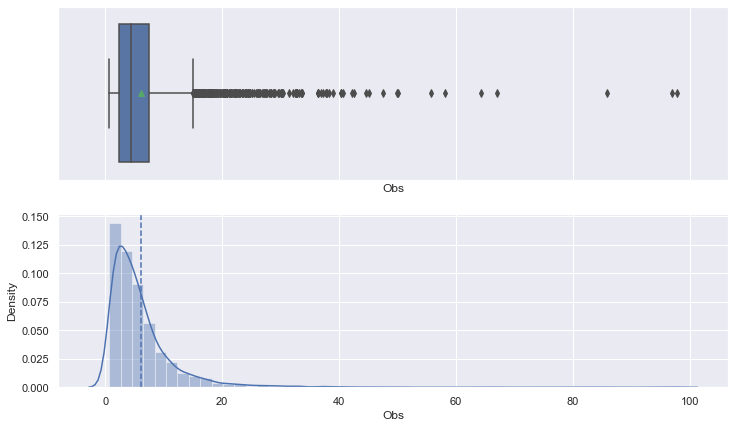

In [47]:
histogram_boxplot(obs['Obs'])

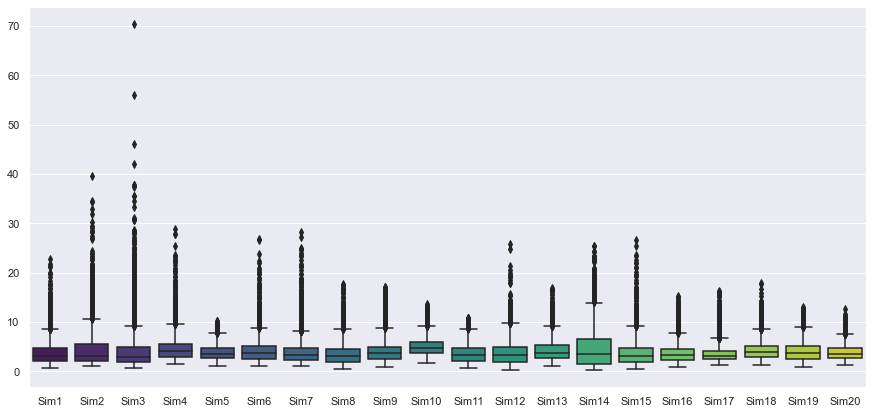

In [48]:
plt.figure(figsize=(15,7))
sns.boxplot(data=sim, palette='viridis');

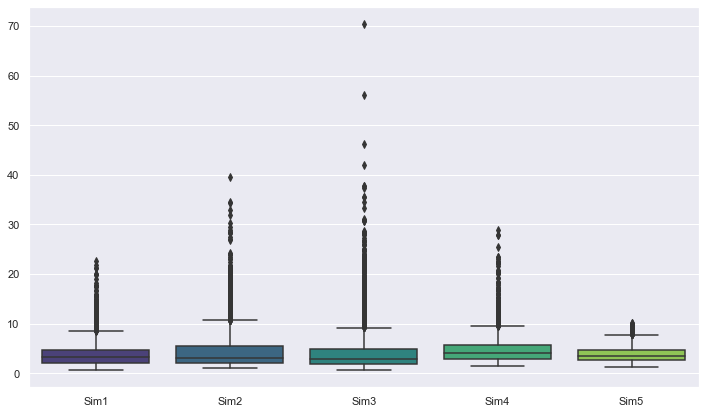

In [49]:
plt.figure(figsize=(12,7))
sns.boxplot(data=sim[['Sim1','Sim2','Sim3','Sim4','Sim5']],palette='viridis');

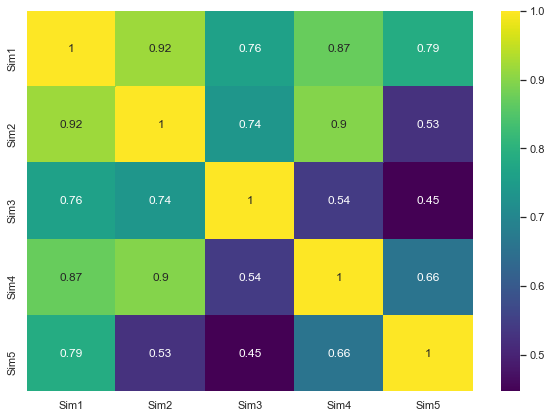

In [50]:
sim5 = sim[['Sim1','Sim2','Sim3','Sim4','Sim5']]
plt.figure(figsize=(10,7))
sns.heatmap(sim5.corr(),annot=True,cmap='viridis');

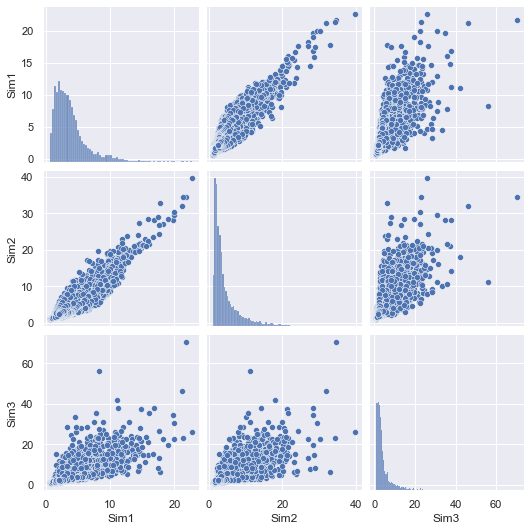

In [51]:
sim3 = sim[['Sim1','Sim2','Sim3']]
sns.pairplot(sim3);

In [60]:
from hydroeval import evaluator, nse
my_nse = evaluator(nse, sim, obs, axis=0);my_nse = my_nse.T;

In [61]:
my_nse = {'Simulation':['Sim1','Sim2','Sim3','Sim4','Sim5','Sim6','Sim7','Sim8','Sim9','Sim10',
    'Sim11','Sim12','Sim13','Sim14','Sim15','Sim16','Sim17','Sim18','Sim19','Sim20'],'NSE':my_nse}
my_nse = pd.DataFrame(data=my_nse)

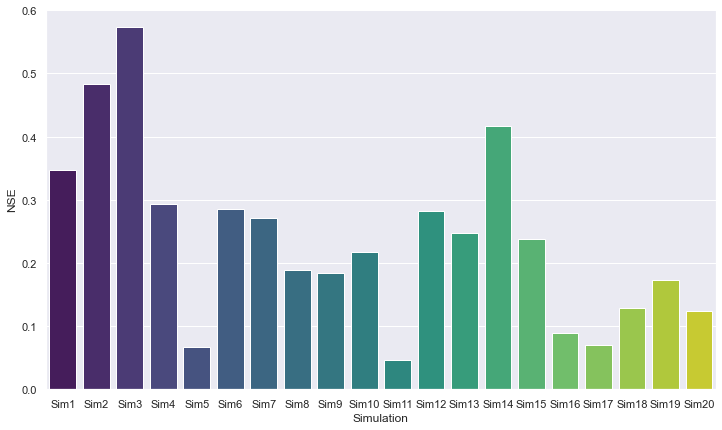

In [64]:
plt.figure(figsize=(12,7))
sns.barplot(x='Simulation',y='NSE',data=my_nse,palette='viridis');